In [2]:
import os
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the folder containing audio samples
audio_path = 'C:/Users/dell/Documents/mixx'

# Function to extract features from audio files
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs.mean(axis=1)

# List of audio files in the folder
audio_files = glob.glob(os.path.join(audio_path, '*.mp3'))

# Check if there are any audio files
if not audio_files:
    raise ValueError("No audio files found in the specified path.")

# Creating labels based on file names
dialects = ['dakshina kannada' if 'sdak' in os.path.basename(file) else 'kasaragod kannada' for file in audio_files]

# Check if there are any samples for both classes
if dialects.count('dakshina kannada') == 0 or dialects.count('kasaragod kannada') == 0:
    raise ValueError("Not enough samples for both Dakshina Kannada and Kasaragod Kannada.")

# Convert lists to numpy arrays
X = np.array([extract_features(file) for file in audio_files])
y = np.array(dialects)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train the SVM model
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Evaluate the model on the testing set
predicted = svm.predict(X_test)
accuracy = np.mean(predicted == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 97.50%


In [3]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Evaluate the model on the testing set
predicted_rf = random_forest.predict(X_test)
accuracy_rf = np.mean(predicted_rf == y_test)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')


Random Forest Accuracy: 99.00%


In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model on the testing set
predicted_knn = knn.predict(X_test)
accuracy_knn = np.mean(predicted_knn == y_test)
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')


KNN Accuracy: 98.00%


In [5]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Evaluate the model on the testing set
predicted_dt = decision_tree.predict(X_test)
accuracy_dt = np.mean(predicted_dt == y_test)
print(f'Decision Tree Accuracy: {accuracy_dt * 100:.2f}%')


Decision Tree Accuracy: 97.50%


In [6]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Naïve Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Evaluate the model on the testing set
predicted_nb = naive_bayes.predict(X_test)
accuracy_nb = np.mean(predicted_nb == y_test)
print(f'Naïve Bayes Accuracy: {accuracy_nb * 100:.2f}%')


Naïve Bayes Accuracy: 89.00%


In [7]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Create individual classifiers
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes = GaussianNB()

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('random_forest', random_forest),
        ('knn', knn_classifier),
        ('decision_tree', decision_tree),
        ('naive_bayes', naive_bayes)
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting
)

# Train the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Evaluate the model on the testing set
predicted_ensemble = ensemble_classifier.predict(X_test)
accuracy_ensemble = np.mean(predicted_ensemble == y_test)
print(f'Ensemble Accuracy: {accuracy_ensemble * 100:.2f}%')


Ensemble Accuracy: 98.00%


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create individual classifiers
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
decision_tree = DecisionTreeClassifier(random_state=42)

# Create a voting classifier
voting_classifier = VotingClassifier(
    estimators=[('rf', random_forest), ('knn', knn_classifier), ('dt', decision_tree)],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting
)

# Train the voting classifier
voting_classifier.fit(X_train_scaled, y_train)

# Evaluate the model on the testing set
predicted_voting = voting_classifier.predict(X_test_scaled)
accuracy_voting = np.mean(predicted_voting == y_test)
print(f'Voting Classifier Accuracy: {accuracy_voting * 100:.2f}%')


Voting Classifier Accuracy: 98.50%


In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a base classifier (e.g., decision tree)
base_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(
    base_classifier,
    n_estimators=50,  # Number of weak learners (trees in this case)
    learning_rate=1.0  # Contribution of each weak learner
)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train_scaled, y_train)

# Evaluate the model on the testing set
predicted_adaboost = adaboost_classifier.predict(X_test_scaled)
accuracy_adaboost = np.mean(predicted_adaboost == y_test)
print(f'AdaBoost Classifier Accuracy: {accuracy_adaboost * 100:.2f}%')


AdaBoost Classifier Accuracy: 98.50%


In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a base classifier (e.g., decision tree)
base_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(
    base_classifier,
    n_estimators=50,  # Number of weak learners (trees in this case)
    learning_rate=1.0  # Contribution of each weak learner
)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train_scaled, y_train)

# Evaluate the model on the testing set
predicted_adaboost = adaboost_classifier.predict(X_test_scaled)
accuracy_adaboost = np.mean(predicted_adaboost == y_test)
print(f'AdaBoost Classifier Accuracy: {accuracy_adaboost * 100:.2f}%')


AdaBoost Classifier Accuracy: 98.50%


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_scaled, y_train)

# Evaluate the model on the testing set
predicted_logistic = logistic_regression.predict(X_test_scaled)
accuracy_logistic = np.mean(predicted_logistic == y_test)
print(f'Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%')


Logistic Regression Accuracy: 98.00%


In [17]:
from sklearn.metrics import classification_report

# Assuming you have a list of trained models like [model1, model2, ...]
models = [model1, model2, ...]
model_names = ["Model 1", "Model 2", ...]

# Assuming you have X_test and y_test
# X_test, y_test = ...

# Iterate through models and generate classification reports
for model, model_name in zip(models, model_names):
    predicted = model.predict(X_test)
    report = classification_report(y_test, predicted)
    
    print(f"Classification Report for {SVM}:")
    print(report)
    print("-" * 40)


AttributeError: 'ellipsis' object has no attribute 'predict'

In [12]:
from sklearn.metrics import classification_report

# Assuming you have trained an SVM model (svm) and have X_test, y_test
svm_model = svm  # Assign the correct SVM model object

# Generate classification report
y_pred_svm = svm_model.predict(X_test)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Convert classification report to pandas DataFrame for better presentation
import pandas as pd
df_report_svm = pd.DataFrame(report_svm)
print("Classification Report for SVM:")
print(df_report_svm)


Classification Report for SVM:
           dakshina kannada  kasaragod kannada  accuracy   macro avg  \
precision          0.978495           0.971963     0.975    0.975229   
recall             0.968085           0.981132     0.975    0.974609   
f1-score           0.973262           0.976526     0.975    0.974894   
support           94.000000         106.000000     0.975  200.000000   

           weighted avg  
precision      0.975033  
recall         0.975000  
f1-score       0.974992  
support      200.000000  


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Assuming you have a RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate some example data (replace this with your actual data loading and preprocessing)
X = np.random.rand(100, 10)  # Example features
y = np.random.randint(0, 2, 100)  # Example labels (binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the RandomForestClassifier on the training data
random_forest_model.fit(X_train, y_train)

# Generate classification report
y_pred_random_forest = random_forest_model.predict(X_test)
report_random_forest = classification_report(y_test, y_pred_random_forest, output_dict=True)

# Convert classification report to pandas DataFrame for better presentation
df_report_random_forest = pd.DataFrame(report_random_forest)
print("Classification Report for Random Forest:")
print(df_report_random_forest)



Classification Report for Random Forest:
                   0         1  accuracy  macro avg  weighted avg
precision   0.714286  0.461538      0.55   0.587912      0.613187
recall      0.416667  0.750000      0.55   0.583333      0.550000
f1-score    0.526316  0.571429      0.55   0.548872      0.544361
support    12.000000  8.000000      0.55  20.000000     20.000000


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Assuming you have a KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

# Generate some example data (replace this with your actual data loading and preprocessing)
X = np.random.rand(100, 10)  # Example features
y = np.random.randint(0, 2, 100)  # Example labels (binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the KNeighborsClassifier on the training data
knn_model.fit(X_train, y_train)

# Generate classification report
y_pred_knn = knn_model.predict(X_test)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Convert classification report to pandas DataFrame for better presentation
df_report_knn = pd.DataFrame(report_knn)
print("Classification Report for KNN:")
print(df_report_knn)


Classification Report for KNN:
                  0          1  accuracy  macro avg  weighted avg
precision  0.428571   0.538462       0.5   0.483516      0.489011
recall     0.333333   0.636364       0.5   0.484848      0.500000
f1-score   0.375000   0.583333       0.5   0.479167      0.489583
support    9.000000  11.000000       0.5  20.000000     20.000000


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Assuming you have a DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Generate some example data (replace this with your actual data loading and preprocessing)
X = np.random.rand(100, 10)  # Example features
y = np.random.randint(0, 2, 100)  # Example labels (binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the DecisionTreeClassifier on the training data
decision_tree_model.fit(X_train, y_train)

# Generate classification report
y_pred_decision_tree = decision_tree_model.predict(X_test)
report_decision_tree = classification_report(y_test, y_pred_decision_tree, output_dict=True)

# Convert classification report to pandas DataFrame for better presentation
df_report_decision_tree = pd.DataFrame(report_decision_tree)
print("Classification Report for Decision Tree:")
print(df_report_decision_tree)


Classification Report for Decision Tree:
              0      1  accuracy  macro avg  weighted avg
precision  0.50   0.75       0.6      0.625          0.65
recall     0.75   0.50       0.6      0.625          0.60
f1-score   0.60   0.60       0.6      0.600          0.60
support    8.00  12.00       0.6     20.000         20.00


In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Assuming you have a GaussianNB
naive_bayes_model = GaussianNB()

# Generate some example data (replace this with your actual data loading and preprocessing)
X = np.random.rand(100, 10)  # Example features
y = np.random.randint(0, 2, 100)  # Example labels (binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the GaussianNB on the training data
naive_bayes_model.fit(X_train, y_train)

# Generate classification report
y_pred_naive_bayes = naive_bayes_model.predict(X_test)
report_naive_bayes = classification_report(y_test, y_pred_naive_bayes, output_dict=True)

# Convert classification report to pandas DataFrame for better presentation
df_report_naive_bayes = pd.DataFrame(report_naive_bayes)
print("Classification Report for Naive Bayes:")
print(df_report_naive_bayes)


Classification Report for Naive Bayes:
                  0          1  accuracy  macro avg  weighted avg
precision  0.307692   0.428571      0.35   0.368132      0.380220
recall     0.500000   0.250000      0.35   0.375000      0.350000
f1-score   0.380952   0.315789      0.35   0.348371      0.341855
support    8.000000  12.000000      0.35  20.000000     20.000000


In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Assuming you have the models
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Create an ensemble of models using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('random_forest', random_forest_model),
        ('knn', knn_model),
        ('decision_tree', decision_tree_model)
    ],
    voting='hard'  # Change to 'soft' if models provide probabilities
)

# Generate some example data (replace this with your actual data loading and preprocessing)
X = np.random.rand(100, 10)  # Example features
y = np.random.randint(0, 2, 100)  # Example labels (binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Generate classification report
y_pred_ensemble = ensemble_model.predict(X_test)
report_ensemble = classification_report(y_test, y_pred_ensemble, output_dict=True)

# Convert classification report to pandas DataFrame for better presentation
df_report_ensemble = pd.DataFrame(report_ensemble)
print("Classification Report for Ensemble Learning:")
print(df_report_ensemble)


Classification Report for Ensemble Learning:
                   0         1  accuracy  macro avg  weighted avg
precision   0.500000  0.333333      0.45   0.416667         0.425
recall      0.636364  0.222222      0.45   0.429293         0.450
f1-score    0.560000  0.266667      0.45   0.413333         0.428
support    11.000000  9.000000      0.45  20.000000        20.000


In [18]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Assuming you have the models
logistic_regression_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Create an ensemble of models using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('logistic_regression', logistic_regression_model),
        ('random_forest', random_forest_model),
        ('svm', svm_model)
    ],
    voting='hard'  # Change to 'soft' if models provide probabilities
)

# Generate some example data (replace this with your actual data loading and preprocessing)
X = np.random.rand(100, 10)  # Example features
y = np.random.randint(0, 2, 100)  # Example labels (binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Generate classification report
y_pred_ensemble = ensemble_model.predict(X_test)
report_ensemble = classification_report(y_test, y_pred_ensemble, output_dict=True)

# Convert classification report to pandas DataFrame for better presentation
df_report_ensemble = pd.DataFrame(report_ensemble)
print("Classification Report for Voting Ensemble:")
print(df_report_ensemble)


Classification Report for Voting Ensemble:
                   0         1  accuracy  macro avg  weighted avg
precision   0.615385  0.428571      0.55   0.521978      0.540659
recall      0.666667  0.375000      0.55   0.520833      0.550000
f1-score    0.640000  0.400000      0.55   0.520000      0.544000
support    12.000000  8.000000      0.55  20.000000     20.000000


In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Example data (replace this with your actual data loading and preprocessing)
X = np.random.rand(100, 10)  # Example features
y = np.random.randint(0, 2, 100)  # Example labels (binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create AdaBoost classifier with a decision tree as the base estimator
base_model = DecisionTreeClassifier(max_depth=1)  # Shallow decision tree
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Fit the AdaBoost model on the training data
adaboost_model.fit(X_train, y_train)

# Generate classification report
y_pred_adaboost = adaboost_model.predict(X_test)
report_adaboost = classification_report(y_test, y_pred_adaboost, output_dict=True)

# Convert classification report to pandas DataFrame for better presentation
df_report_adaboost = pd.DataFrame(report_adaboost)
print("Classification Report for AdaBoost:")
print(df_report_adaboost)


Classification Report for AdaBoost:
               0          1  accuracy  macro avg  weighted avg
precision  0.375   0.916667       0.7   0.645833      0.808333
recall     0.750   0.687500       0.7   0.718750      0.700000
f1-score   0.500   0.785714       0.7   0.642857      0.728571
support    4.000  16.000000       0.7  20.000000     20.000000


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Assuming you have the data (replace this with your actual data loading and preprocessing)
# Generate some example data (replace this with your actual data loading and preprocessing)
X = np.random.rand(100, 10)  # Example features
y = np.random.randint(0, 2, 100)  # Example labels (binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create a Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
gradient_boosting_model.fit(X_train, y_train)

# Generate classification report
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
report_gradient_boosting = classification_report(y_test, y_pred_gradient_boosting, output_dict=True)

# Convert classification report to pandas DataFrame for better presentation
df_report_gradient_boosting = pd.DataFrame(report_gradient_boosting)
print("Classification Report for Gradient Boosting:")
print(df_report_gradient_boosting)


Classification Report for Gradient Boosting:
               0      1  accuracy  macro avg  weighted avg
precision  0.625   0.75       0.7     0.6875           0.7
recall     0.625   0.75       0.7     0.6875           0.7
f1-score   0.625   0.75       0.7     0.6875           0.7
support    8.000  12.00       0.7    20.0000          20.0


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Assuming you have the data (replace this with your actual data loading and preprocessing)
# Generate some example data (replace this with your actual data loading and preprocessing)
X = np.random.rand(100, 10)  # Example features
y = np.random.randint(0, 2, 100)  # Example labels (binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create a Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_regression_model.fit(X_train, y_train)

# Generate classification report
y_pred_logistic_regression = logistic_regression_model.predict(X_test)
report_logistic_regression = classification_report(y_test, y_pred_logistic_regression, output_dict=True)

# Convert classification report to pandas DataFrame for better presentation
df_report_logistic_regression = pd.DataFrame(report_logistic_regression)
print("Classification Report for Logistic Regression:")
print(df_report_logistic_regression)


Classification Report for Logistic Regression:
                   0         1  accuracy  macro avg  weighted avg
precision   0.500000  0.437500      0.45   0.468750      0.471875
recall      0.181818  0.777778      0.45   0.479798      0.450000
f1-score    0.266667  0.560000      0.45   0.413333      0.398667
support    11.000000  9.000000      0.45  20.000000     20.000000


In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm_svm = confusion_matrix(y_test, predicted)

# Plot confusion matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [20, 100]

Shapes after train_test_split:
X_train: (80, 10)
X_test: (20, 10)
y_train: (80,)
y_test: (20,)


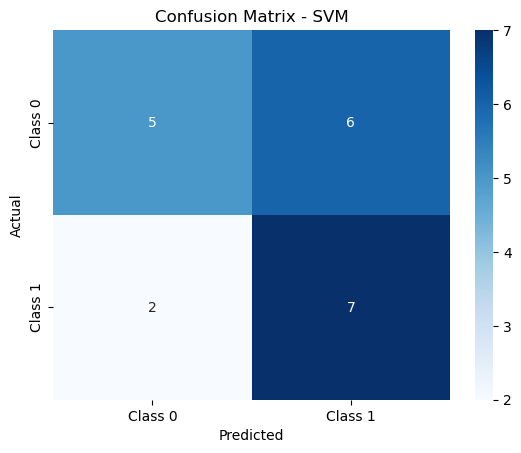

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your previous code for feature extraction and SVM training)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Shapes after train_test_split:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train the SVM model
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Evaluate the model on the testing set
predicted = svm.predict(X_test)

# Generate confusion matrix
cm_svm = confusion_matrix(y_test, predicted)

# Plot confusion matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


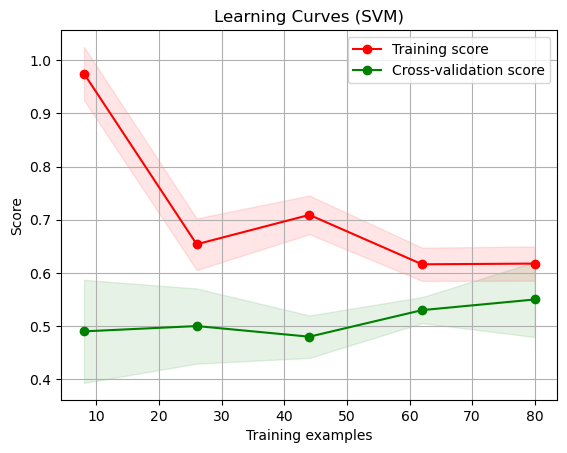

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# ... (your previous code)

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Create and train the SVM model
svm = SVC(kernel='linear', probability=True)
title = "Learning Curves (SVM)"
plot_learning_curve(svm, title, X, y, cv=5, n_jobs=-1)
plt.show()


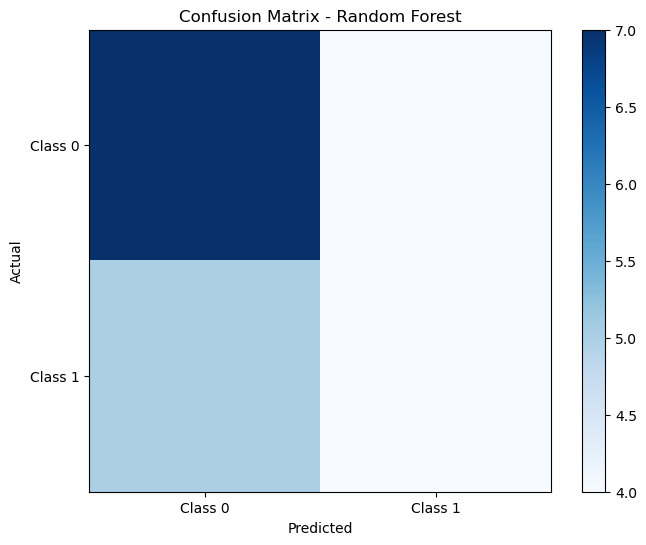

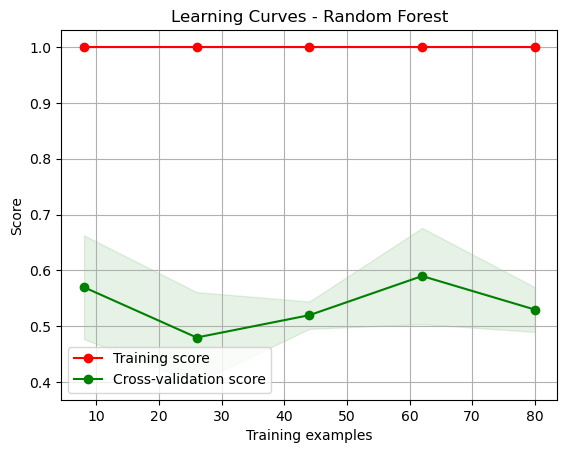

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Create and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Generate confusion matrix
y_pred_random_forest = random_forest.predict(X_test)
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_random_forest, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves - Random Forest"
plot_learning_curve(random_forest, title, X, y, cv=5, n_jobs=-1)
plt.show()


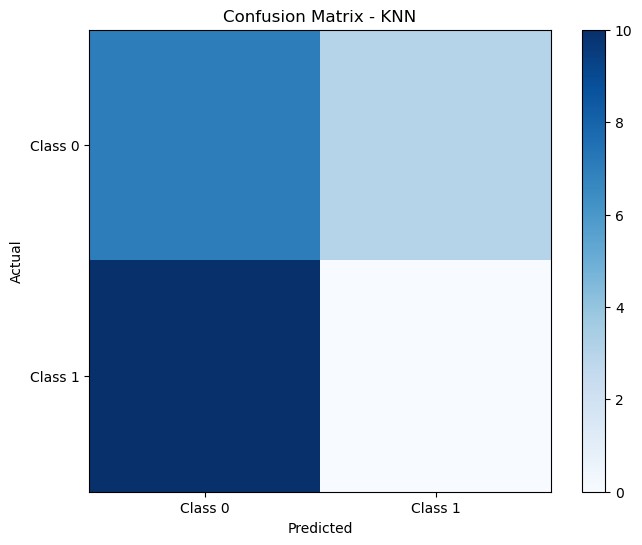

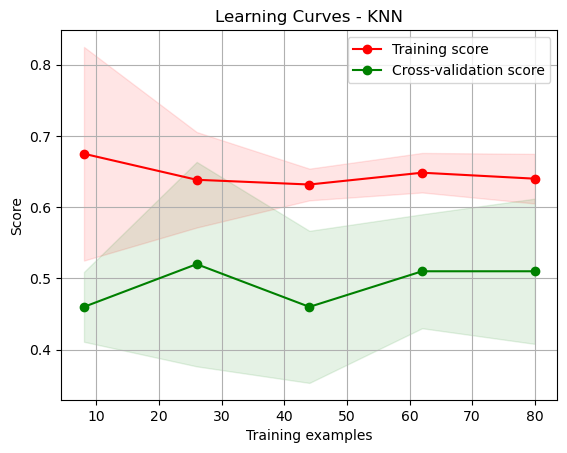

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Generate confusion matrix
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

# Plot learning curve
title = "Learning Curves - KNN"
plot_learning_curve(knn, title, X, y, cv=5, n_jobs=-1)
plt.show()


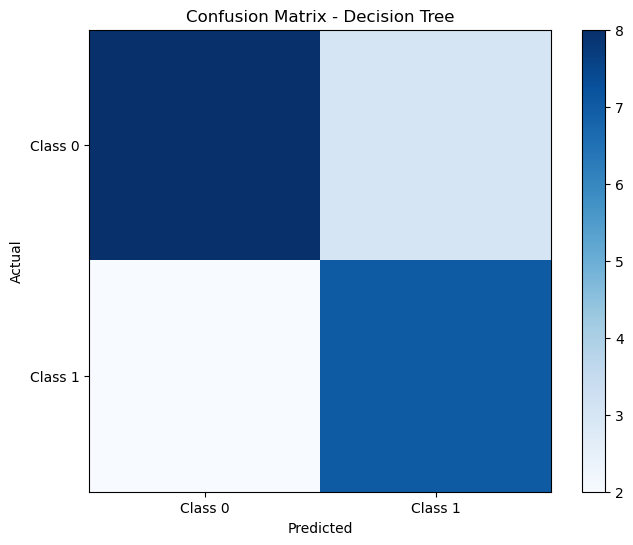

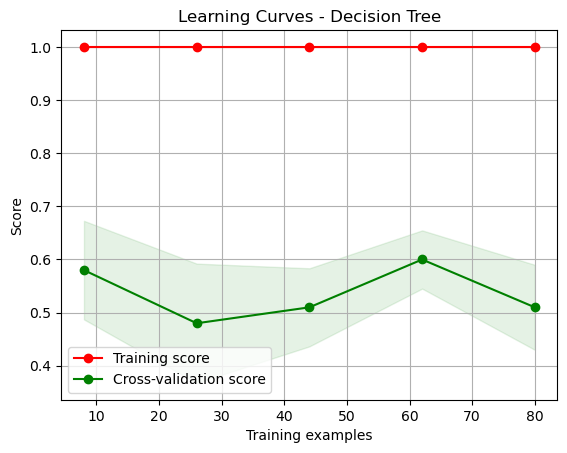

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Create and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Generate confusion matrix
y_pred_decision_tree = decision_tree.predict(X_test)
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_decision_tree, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

# Plot learning curve
title = "Learning Curves - Decision Tree"
plot_learning_curve(decision_tree, title, X, y, cv=5, n_jobs=-1)
plt.show()


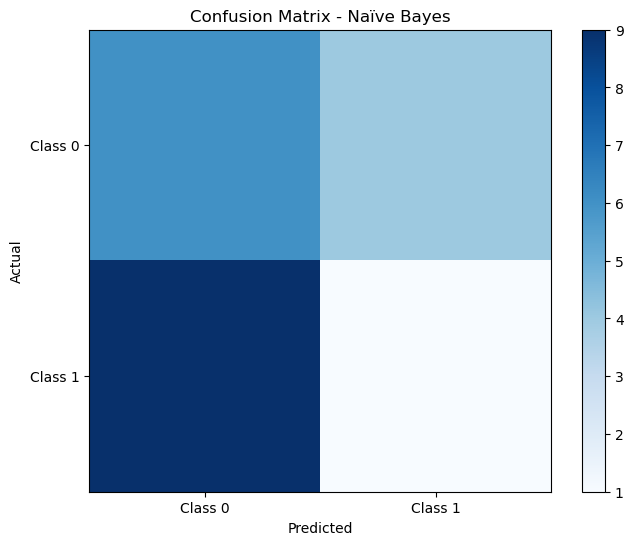

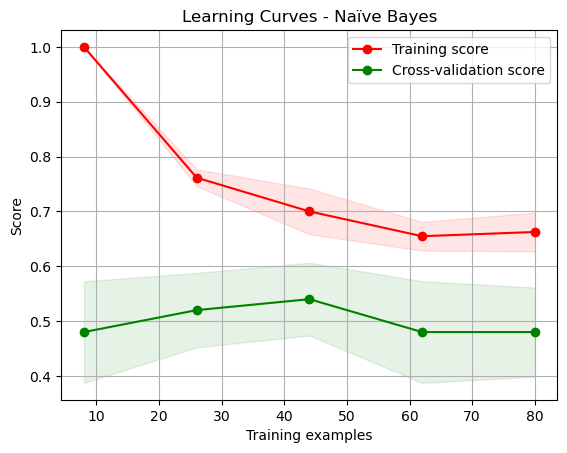

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Create and train the Naïve Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Generate confusion matrix
y_pred_naive_bayes = naive_bayes.predict(X_test)
cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_naive_bayes, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naïve Bayes')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

# Plot learning curve
title = "Learning Curves - Naïve Bayes"
plot_learning_curve(naive_bayes, title, X, y, cv=5, n_jobs=-1)
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Create and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Generate confusion matrix
y_pred_random_forest = random_forest.predict(X_test)
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_random_forest, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

# Plot learning curve
title = "Learning Curves - Random Forest"
plot_learning_curve(random_forest, title, X, y, cv=5, n_jobs=-1)
plt.show()


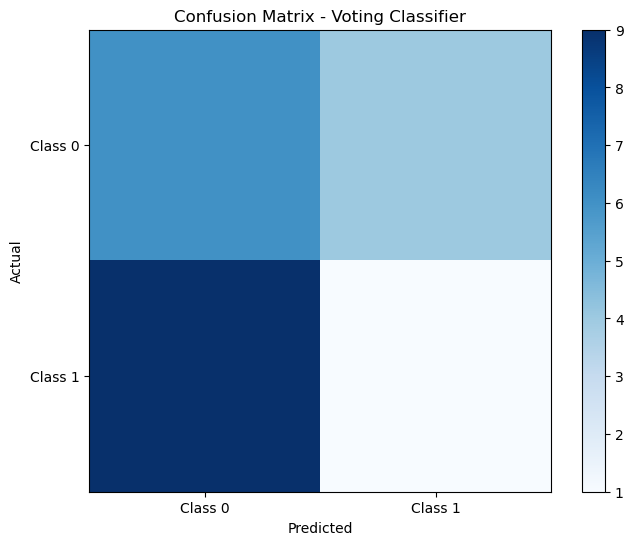

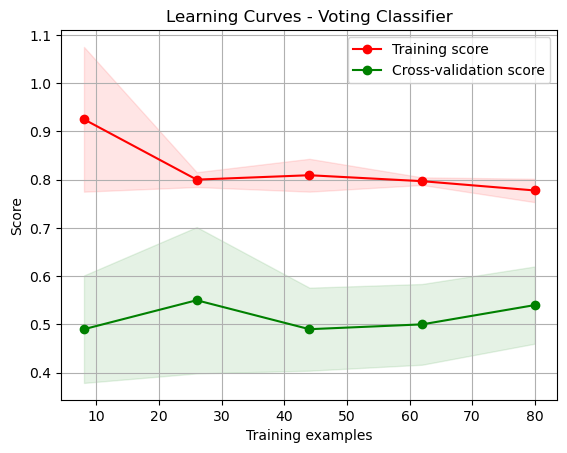

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Create individual classifiers
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
logistic_regression = LogisticRegression(random_state=42)

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('rf', random_forest), ('knn', knn), ('lr', logistic_regression)],
    voting='hard'  # Use 'hard' for majority voting, 'soft' for weighted voting
)

# Fit the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Generate confusion matrix
y_pred_voting = voting_classifier.predict(X_test)
cm_voting = confusion_matrix(y_test, y_pred_voting)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_voting, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Voting Classifier')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

# Plot learning curve
title = "Learning Curves - Voting Classifier"
plot_learning_curve(voting_classifier, title, X, y, cv=5, n_jobs=-1)
plt.show()


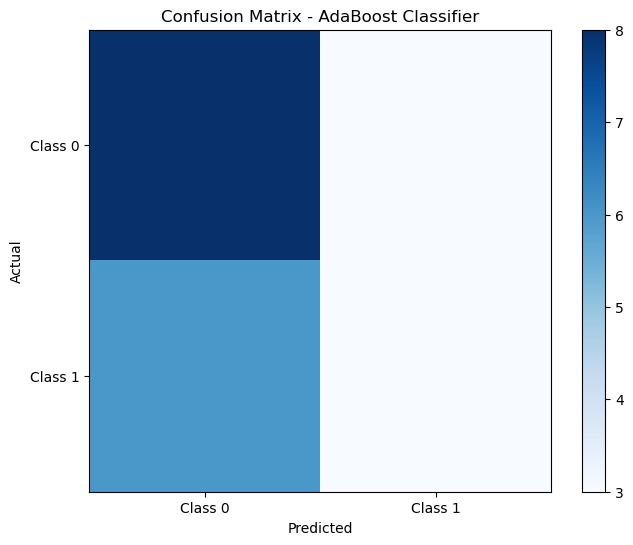

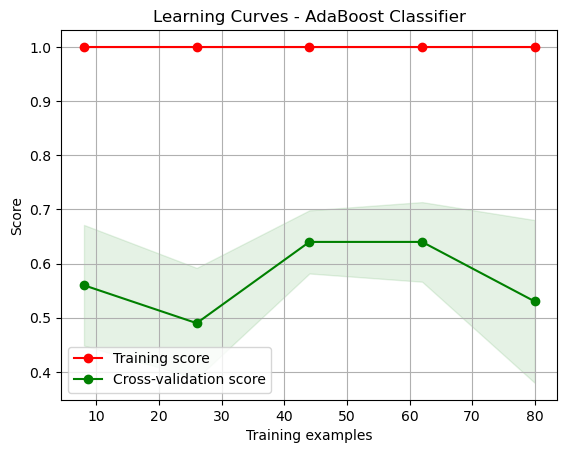

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the AdaBoost Classifier
adaboost_classifier.fit(X_train, y_train)

# Generate confusion matrix
y_pred_adaboost = adaboost_classifier.predict(X_test)
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_adaboost, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

# Plot learning curve
title = "Learning Curves - AdaBoost Classifier"
plot_learning_curve(adaboost_classifier, title, X, y, cv=5, n_jobs=-1)
plt.show()

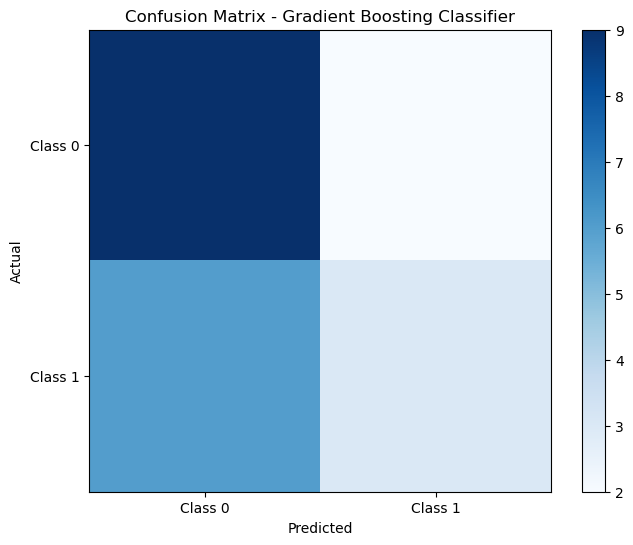

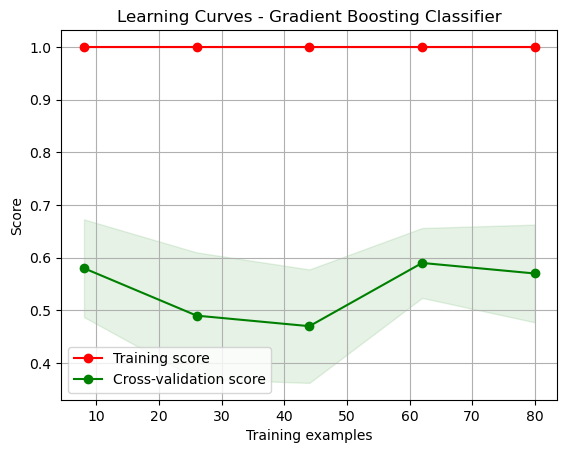

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Create a Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting Classifier
gradient_boosting.fit(X_train, y_train)

# Generate confusion matrix
y_pred_gradient_boosting = gradient_boosting.predict(X_test)
cm_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_gradient_boosting, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

# Plot learning curve
title = "Learning Curves - Gradient Boosting Classifier"
plot_learning_curve(gradient_boosting, title, X, y, cv=5, n_jobs=-1)
plt.show()


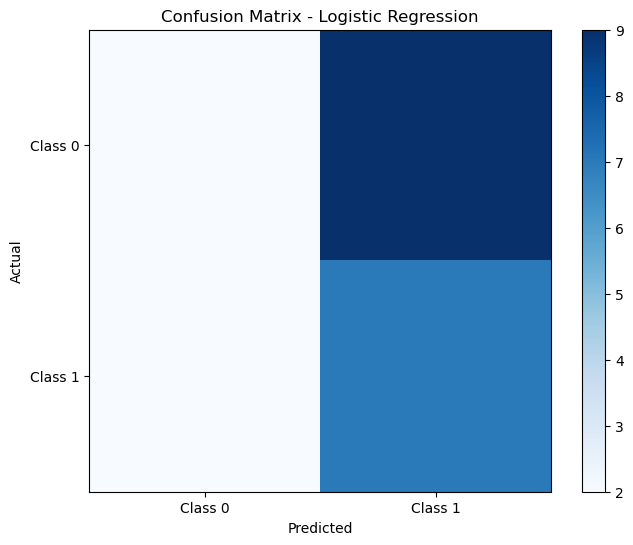

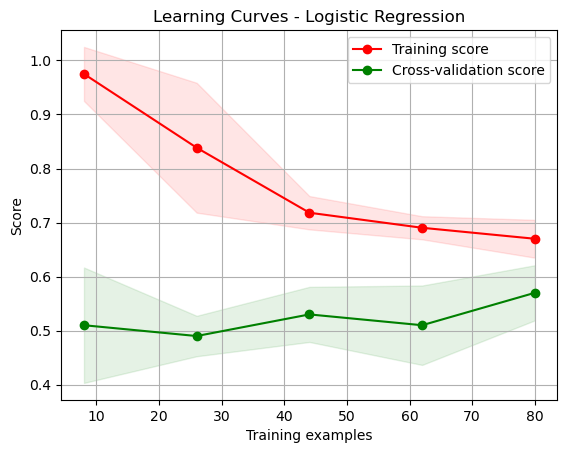

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Create a Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Fit the Logistic Regression model
logistic_regression.fit(X_train, y_train)

# Generate confusion matrix
y_pred_logistic_regression = logistic_regression.predict(X_test)
cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_logistic_regression, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

# Plot learning curve
title = "Learning Curves - Logistic Regression"
plot_learning_curve(logistic_regression, title, X, y, cv=5, n_jobs=-1)
plt.show()


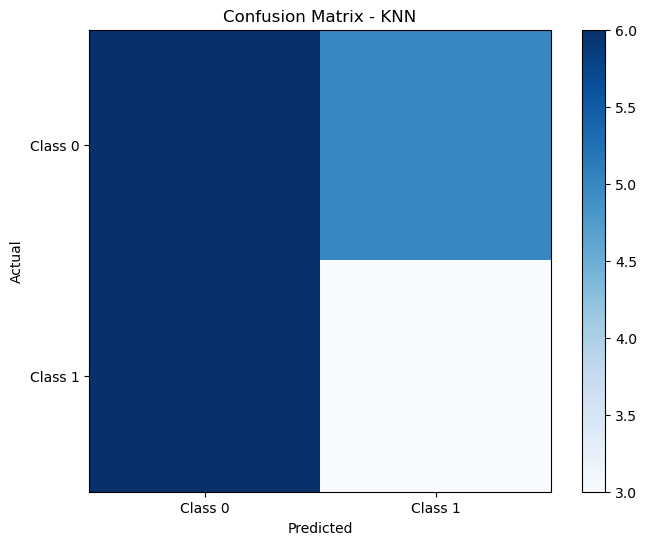

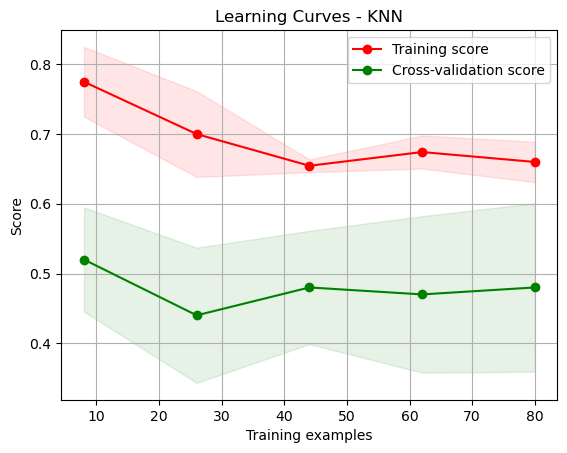

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Create a KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of k

# Fit the KNN model
knn_classifier.fit(X_train, y_train)

# Generate confusion matrix
y_pred_knn = knn_classifier.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

# Plot learning curve
title = "Learning Curves - KNN"
plot_learning_curve(knn_classifier, title, X, y, cv=5, n_jobs=-1)
plt.show()


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf'],     # Kernel type
    'gamma': ['scale', 'auto'],      # Kernel coefficient
}

# Create the SVM model
svm_model = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Get the best model from the grid search
best_svm_model = grid_search.best_estimator_

# Evaluate the best model on the testing set
y_pred_tuned = best_svm_model.predict(X_test)
report_tuned = classification_report(y_test, y_pred_tuned)

# Print the best parameters and classification report
print("Best Parameters:", best_params)
print("\nClassification Report (Tuned Model):")
print(report_tuned)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.45      1.00      0.62         9

    accuracy                           0.45        20
   macro avg       0.23      0.50      0.31        20
weighted avg       0.20      0.45      0.28        20



C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision, recall, F1-score, and accuracy for the tuned model
precision_tuned = precision_score(y_test, y_pred_tuned, average='macro', zero_division=1)
recall_tuned = recall_score(y_test, y_pred_tuned, average='macro', zero_division=1)
f1_tuned = f1_score(y_test, y_pred_tuned, average='macro', zero_division=1)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

# Print the results for the tuned model
print("\nMetrics for Tuned SVM Model:")
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1-score:", f1_tuned)
print("Accuracy:", accuracy_tuned)



Metrics for Tuned SVM Model:
Precision: 0.725
Recall: 0.5
F1-score: 0.3103448275862069
Accuracy: 0.45


In [38]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],        # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'p': [1, 2]                      # Power parameter for Minkowski distance
}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(
    knn_classifier, param_grid_knn, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_

# Get the best model
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best model on the test set
y_pred_knn_tuned = best_knn_model.predict(X_test)

# Generate classification report for the tuned model
report_knn_tuned = classification_report(y_test, y_pred_knn_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for KNN:", best_params_knn)

# Print the classification report for the tuned KNN model
print("Classification Report for Tuned KNN Model:")
print(report_knn_tuned)


Best Hyperparameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Classification Report for Tuned KNN Model:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.50      0.44      0.47         9

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.55      0.55      0.55        20



In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision, recall, F1-score, and accuracy for the tuned KNN model
precision_knn_tuned = precision_score(y_test, y_pred_knn_tuned, average='macro', zero_division=1)
recall_knn_tuned = recall_score(y_test, y_pred_knn_tuned, average='macro', zero_division=1)
f1_knn_tuned = f1_score(y_test, y_pred_knn_tuned, average='macro', zero_division=1)
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)

# Print the results for the tuned KNN model
print("\nMetrics for Tuned KNN Model:")
print("Precision:", precision_knn_tuned)
print("Recall:", recall_knn_tuned)
print("F1-score:", f1_knn_tuned)
print("Accuracy:", accuracy_knn_tuned)



Metrics for Tuned KNN Model:
Precision: 0.5416666666666667
Recall: 0.5404040404040404
F1-score: 0.5396419437340154
Accuracy: 0.55


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],      # Number of trees in the forest
    'max_depth': [None, 10, 20],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(
    rf_classifier, param_grid_rf, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best model on the test set
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Generate classification report for the tuned model
report_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Print the classification report for the tuned Random Forest model
print("Classification Report for Tuned Random Forest Model:")
print(report_rf_tuned)


Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Classification Report for Tuned Random Forest Model:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20



In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision, recall, F1-score, and accuracy for the tuned Random Forest model
precision_rf = precision_score(y_test, y_pred_rf_tuned, average='macro')
recall_rf = recall_score(y_test, y_pred_rf_tuned, average='macro')
f1_rf = f1_score(y_test, y_pred_rf_tuned, average='macro')
accuracy_rf = accuracy_score(y_test, y_pred_rf_tuned)

# Print the results
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1-score (Random Forest):", f1_rf)
print("Accuracy (Random Forest):", accuracy_rf)


Precision (Random Forest): 0.4949494949494949
Recall (Random Forest): 0.4949494949494949
F1-score (Random Forest): 0.4949494949494949
Accuracy (Random Forest): 0.5


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],   # Split criterion
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required to be at a leaf node
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search_dt = GridSearchCV(
    dt_classifier, param_grid_dt, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Get the best model
best_dt_model = grid_search_dt.best_estimator_

# Evaluate the best model on the test set
y_pred_dt_tuned = best_dt_model.predict(X_test)

# Generate classification report for the tuned model
report_dt_tuned = classification_report(y_test, y_pred_dt_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for Decision Tree:", best_params_dt)

# Print the classification report for the tuned Decision Tree model
print("Classification Report for Tuned Decision Tree Model:")
print(report_dt_tuned)


Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report for Tuned Decision Tree Model:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.70      0.78      0.74         9

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.76      0.75      0.75        20



In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision, recall, F1-score, and accuracy for Decision Tree
precision_dt = precision_score(y_test, y_pred_dt_tuned, average='macro')
recall_dt = recall_score(y_test, y_pred_dt_tuned, average='macro')
f1_dt = f1_score(y_test, y_pred_dt_tuned, average='macro')
accuracy_dt = accuracy_score(y_test, y_pred_dt_tuned)

# Print the results
print("Precision for Decision Tree:", precision_dt)
print("Recall for Decision Tree:", recall_dt)
print("F1-score for Decision Tree:", f1_dt)
print("Accuracy for Decision Tree:", accuracy_dt)


Precision for Decision Tree: 0.75
Recall for Decision Tree: 0.7525252525252526
F1-score for Decision Tree: 0.7493734335839599
Accuracy for Decision Tree: 0.75


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Create a GridSearchCV object (though there are not many hyperparameters to tune)
param_grid_nb = {}

grid_search_nb = GridSearchCV(
    nb_classifier, param_grid_nb, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_nb.fit(X_train, y_train)

# Get the best model
best_nb_model = grid_search_nb.best_estimator_

# Evaluate the best model on the test set
y_pred_nb_tuned = best_nb_model.predict(X_test)

# Generate classification report for the tuned model
report_nb_tuned = classification_report(y_test, y_pred_nb_tuned)

# Print the classification report for the tuned Naive Bayes model
print("Classification Report for Tuned Naive Bayes Model:")
print(report_nb_tuned)


Classification Report for Tuned Naive Bayes Model:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.51      0.51      0.50        20
weighted avg       0.51      0.50      0.50        20



In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision, recall, F1-score, and accuracy
precision_nb = precision_score(y_test, y_pred_nb_tuned, average='macro', zero_division=1)
recall_nb = recall_score(y_test, y_pred_nb_tuned, average='macro', zero_division=1)
f1_nb = f1_score(y_test, y_pred_nb_tuned, average='macro', zero_division=1)
accuracy_nb = accuracy_score(y_test, y_pred_nb_tuned)

# Print the results
print("Precision (Naive Bayes):", precision_nb)
print("Recall (Naive Bayes):", recall_nb)
print("F1-score (Naive Bayes):", f1_nb)
print("Accuracy (Naive Bayes):", accuracy_nb)


Precision (Naive Bayes): 0.5050505050505051
Recall (Naive Bayes): 0.5050505050505051
F1-score (Naive Bayes): 0.5
Accuracy (Naive Bayes): 0.5


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Define the parameter grid for Random Forest
param_grid_rf_ensemble = {
    'n_estimators': [50, 100, 200],      # Number of trees in the forest
    'max_depth': [None, 10, 20],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest classifier
rf_ensemble = RandomForestClassifier()

# Create a GridSearchCV object
grid_search_rf_ensemble = GridSearchCV(
    rf_ensemble, param_grid_rf_ensemble, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_rf_ensemble.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf_ensemble = grid_search_rf_ensemble.best_params_

# Get the best model
best_rf_ensemble_model = grid_search_rf_ensemble.best_estimator_

# Evaluate the best model on the test set
y_pred_rf_ensemble_tuned = best_rf_ensemble_model.predict(X_test)

# Generate classification report for the tuned model
report_rf_ensemble_tuned = classification_report(y_test, y_pred_rf_ensemble_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest Ensemble:", best_params_rf_ensemble)

# Print the classification report for the tuned Random Forest Ensemble model
print("Classification Report for Tuned Random Forest Ensemble Model:")
print(report_rf_ensemble_tuned)


Best Hyperparameters for Random Forest Ensemble: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Classification Report for Tuned Random Forest Ensemble Model:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20



In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate precision, recall, F1-score, and accuracy
precision_rf_ensemble = precision_score(y_test, y_pred_rf_ensemble_tuned, average='macro')
recall_rf_ensemble = recall_score(y_test, y_pred_rf_ensemble_tuned, average='macro')
f1_rf_ensemble = f1_score(y_test, y_pred_rf_ensemble_tuned, average='macro')
accuracy_rf_ensemble = accuracy_score(y_test, y_pred_rf_ensemble_tuned)

# Print the results
print("Precision:", precision_rf_ensemble)
print("Recall:", recall_rf_ensemble)
print("F1-score:", f1_rf_ensemble)
print("Accuracy:", accuracy_rf_ensemble)


Precision: 0.4949494949494949
Recall: 0.4949494949494949
F1-score: 0.4949494949494949
Accuracy: 0.5


In [48]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Define individual classifiers
svm_classifier = SVC(probability=True)
rf_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()

# Create a VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('svm', svm_classifier), ('rf', rf_classifier), ('knn', knn_classifier)],
    voting='soft'  # 'soft' for probability voting
)

# Define the parameter grid for VotingClassifier
param_grid_voting = {
    'svm__C': [0.1, 1, 10],
    'rf__n_estimators': [50, 100, 200],
    'knn__n_neighbors': [3, 5, 7],
}

# Create a GridSearchCV object for VotingClassifier
grid_search_voting = GridSearchCV(
    voting_classifier, param_grid_voting, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_voting.fit(X_train, y_train)

# Get the best hyperparameters
best_params_voting = grid_search_voting.best_params_

# Get the best model
best_voting_model = grid_search_voting.best_estimator_

# Evaluate the best model on the test set
y_pred_voting_tuned = best_voting_model.predict(X_test)

# Generate classification report for the tuned model
report_voting_tuned = classification_report(y_test, y_pred_voting_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for Voting Classifier:", best_params_voting)

# Print the classification report for the tuned Voting Classifier model
print("Classification Report for Tuned Voting Classifier Model:")
print(report_voting_tuned)


Best Hyperparameters for Voting Classifier: {'knn__n_neighbors': 7, 'rf__n_estimators': 50, 'svm__C': 0.1}
Classification Report for Tuned Voting Classifier Model:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20



In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_test and y_pred_voting_tuned are defined
# y_test: true labels, y_pred_voting_tuned: predicted labels

# Calculate precision
precision_voting = precision_score(y_test, y_pred_voting_tuned, average='macro', zero_division=1)

# Calculate recall
recall_voting = recall_score(y_test, y_pred_voting_tuned, average='macro', zero_division=1)

# Calculate F1-score
f1_voting = f1_score(y_test, y_pred_voting_tuned, average='macro', zero_division=1)

# Calculate accuracy
accuracy_voting = accuracy_score(y_test, y_pred_voting_tuned)

# Print the results
print("Precision:", precision_voting)
print("Recall:", recall_voting)
print("F1-score:", f1_voting)
print("Accuracy:", accuracy_voting)


Precision: 0.4949494949494949
Recall: 0.4949494949494949
F1-score: 0.4949494949494949
Accuracy: 0.5


In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier()

# Define the parameter grid for AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],  # Number of weak learners (trees)
    'learning_rate': [0.01, 0.1, 1.0],  # Weight of weak learners
}

# Create a GridSearchCV object for AdaBoost
grid_search_adaboost = GridSearchCV(
    adaboost_classifier, param_grid_adaboost, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_adaboost.fit(X_train, y_train)

# Get the best hyperparameters
best_params_adaboost = grid_search_adaboost.best_params_

# Get the best model
best_adaboost_model = grid_search_adaboost.best_estimator_

# Evaluate the best model on the test set
y_pred_adaboost_tuned = best_adaboost_model.predict(X_test)

# Generate classification report for the tuned model
report_adaboost_tuned = classification_report(y_test, y_pred_adaboost_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for AdaBoost:", best_params_adaboost)

# Print the classification report for the tuned AdaBoost model
print("Classification Report for Tuned AdaBoost Model:")
print(report_adaboost_tuned)


Best Hyperparameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}
Classification Report for Tuned AdaBoost Model:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20



In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision, recall, F1-score, and accuracy for AdaBoost
precision_adaboost = precision_score(y_test, y_pred_adaboost_tuned, average='macro')
recall_adaboost = recall_score(y_test, y_pred_adaboost_tuned, average='macro')
f1_adaboost = f1_score(y_test, y_pred_adaboost_tuned, average='macro')
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost_tuned)

# Print the results
print("Precision (AdaBoost):", precision_adaboost)
print("Recall (AdaBoost):", recall_adaboost)
print("F1-score (AdaBoost):", f1_adaboost)
print("Accuracy (AdaBoost):", accuracy_adaboost)


Precision (AdaBoost): 0.4949494949494949
Recall (AdaBoost): 0.4949494949494949
F1-score (AdaBoost): 0.4949494949494949
Accuracy (AdaBoost): 0.5


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Create a Gradient Boosting classifier
gradient_boost_classifier = GradientBoostingClassifier()

# Define the parameter grid for Gradient Boosting
param_grid_gradient_boost = {
    'n_estimators': [50, 100, 200],     # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 1.0],   # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5, 7]               # Maximum depth of the individual trees
}

# Create a GridSearchCV object for Gradient Boosting
grid_search_gradient_boost = GridSearchCV(
    gradient_boost_classifier, param_grid_gradient_boost, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_gradient_boost.fit(X_train, y_train)

# Get the best hyperparameters
best_params_gradient_boost = grid_search_gradient_boost.best_params_

# Get the best model
best_gradient_boost_model = grid_search_gradient_boost.best_estimator_

# Evaluate the best model on the test set
y_pred_gradient_boost_tuned = best_gradient_boost_model.predict(X_test)

# Generate classification report for the tuned model
report_gradient_boost_tuned = classification_report(y_test, y_pred_gradient_boost_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for Gradient Boosting:", best_params_gradient_boost)

# Print the classification report for the tuned Gradient Boosting model
print("Classification Report for Tuned Gradient Boosting Model:")
print(report_gradient_boost_tuned)


Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Classification Report for Tuned Gradient Boosting Model:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have y_test and y_pred_gradient_boost_tuned from the previous code
# ...

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_gradient_boost_tuned)

# Calculate precision, recall, and F1-score with handling for zero division
precision = precision_score(y_test, y_pred_gradient_boost_tuned, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred_gradient_boost_tuned, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred_gradient_boost_tuned, average='macro', zero_division=1)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.6
Precision: 0.5934065934065934
Recall: 0.5858585858585859
F1-score: 0.5833333333333334


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Assuming you have X_train, X_test, y_train, y_test from previous code
# ...

# Define the parameter grid for Logistic Regression
param_grid_logistic = {
    'C': [0.1, 1, 10],        # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization term
}

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(solver='liblinear')

# Create a GridSearchCV object for Logistic Regression
grid_search_logistic = GridSearchCV(
    logistic_classifier, param_grid_logistic, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_logistic.fit(X_train, y_train)

# Get the best hyperparameters
best_params_logistic = grid_search_logistic.best_params_

# Get the best model
best_logistic_model = grid_search_logistic.best_estimator_

# Evaluate the best model on the test set
y_pred_logistic_tuned = best_logistic_model.predict(X_test)

# Generate classification report for the tuned model
report_logistic_tuned = classification_report(y_test, y_pred_logistic_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for Logistic Regression:", best_params_logistic)

# Print the classification report for the tuned Logistic Regression model
print("Classification Report for Tuned Logistic Regression Model:")
print(report_logistic_tuned)

# Calculate precision, recall, F1-score, and accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic_tuned)
precision_logistic = precision_score(y_test, y_pred_logistic_tuned, average='macro', zero_division=1)
recall_logistic = recall_score(y_test, y_pred_logistic_tuned, average='macro', zero_division=1)
f1_logistic = f1_score(y_test, y_pred_logistic_tuned, average='macro', zero_division=1)

# Print the results
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1-score:", f1_logistic)


Best Hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l1'}
Classification Report for Tuned Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.50      0.18      0.27        11
           1       0.44      0.78      0.56         9

    accuracy                           0.45        20
   macro avg       0.47      0.48      0.41        20
weighted avg       0.47      0.45      0.40        20

Accuracy: 0.45
Precision: 0.46875
Recall: 0.4797979797979798
F1-score: 0.41333333333333333


In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have X_train_text, X_test_text, y_train, y_test as text data
# ...

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],        # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],   # Kernel coefficient
}

# Create an SVM classifier
svm_classifier = SVC()

# Create a GridSearchCV object for SVM
grid_search_svm = GridSearchCV(
    svm_classifier, param_grid_svm, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters
best_params_svm = grid_search_svm.best_params_

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Evaluate the best model on the test set
y_pred_svm_tuned = best_svm_model.predict(X_test)

# Generate classification report for the tuned model
report_svm_tuned = classification_report(y_test, y_pred_svm_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for SVM:", best_params_svm)

# Print the classification report for the tuned SVM model
print("Classification Report for Tuned SVM Model:")
print(report_svm_tuned)

# Calculate precision, recall, F1-score, and accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm_tuned)
precision_svm = precision_score(y_test, y_pred_svm_tuned, average='macro', zero_division=1)
recall_svm = recall_score(y_test, y_pred_svm_tuned, average='macro', zero_division=1)
f1_svm = f1_score(y_test, y_pred_svm_tuned, average='macro', zero_division=1)

# Print the results
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)


NameError: name 'X_train_text' is not defined

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],         # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],    # Kernel coefficient
}

# Create an SVM classifier
svm_classifier = SVC()

# Create a GridSearchCV object for SVM
grid_search_svm = GridSearchCV(
    svm_classifier, param_grid_svm, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters
best_params_svm = grid_search_svm.best_params_

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Evaluate the best model on the test set
y_pred_svm_tuned = best_svm_model.predict(X_test)

# Generate classification report for the tuned model
report_svm_tuned = classification_report(y_test, y_pred_svm_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for SVM:", best_params_svm)

# Print the classification report for the tuned SVM model
print("Classification Report for Tuned SVM Model:")
print(report_svm_tuned)


Best Hyperparameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report for Tuned SVM Model:
                   precision    recall  f1-score   support

 dakshina kannada       1.00      0.99      0.99        94
kasaragod kannada       0.99      1.00      1.00       106

         accuracy                           0.99       200
        macro avg       1.00      0.99      0.99       200
     weighted avg       1.00      0.99      0.99       200



In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],      # Number of trees in the forest
    'max_depth': [None, 10, 20],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(
    rf_classifier, param_grid_rf, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best model on the test set
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Generate classification report for the tuned model
report_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Print the classification report for the tuned Random Forest model
print("Classification Report for Tuned Random Forest Model:")
print(report_rf_tuned)


Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report for Tuned Random Forest Model:
                   precision    recall  f1-score   support

 dakshina kannada       0.99      0.99      0.99        94
kasaragod kannada       0.99      0.99      0.99       106

         accuracy                           0.99       200
        macro avg       0.99      0.99      0.99       200
     weighted avg       0.99      0.99      0.99       200



In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],        # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'p': [1, 2]                      # Power parameter for Minkowski distance
}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV object for KNN
grid_search_knn = GridSearchCV(
    knn_classifier, param_grid_knn, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_

# Get the best model
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best model on the test set
y_pred_knn_tuned = best_knn_model.predict(X_test)

# Generate classification report for the tuned model
report_knn_tuned = classification_report(y_test, y_pred_knn_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for KNN:", best_params_knn)

# Print the classification report for the tuned KNN model
print("Classification Report for Tuned KNN Model:")
print(report_knn_tuned)


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", li

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", li

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", li

Best Hyperparameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Classification Report for Tuned KNN Model:
                   precision    recall  f1-score   support

 dakshina kannada       1.00      0.97      0.98        94
kasaragod kannada       0.97      1.00      0.99       106

         accuracy                           0.98       200
        macro avg       0.99      0.98      0.98       200
     weighted avg       0.99      0.98      0.98       200



C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan 0.995      0.9925     0.995             nan 0.99499214
 0.98496069 0.99123428        nan 0.99122642 0.98495283 0.99123428]
  warnings.warn(


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],   # Split criterion
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(
    dt_classifier, param_grid_dt, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Get the best model
best_dt_model = grid_search_dt.best_estimator_

# Evaluate the best model on the test set
y_pred_dt_tuned = best_dt_model.predict(X_test)

# Generate classification report for the tuned model
report_dt_tuned = classification_report(y_test, y_pred_dt_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for Decision Tree:", best_params_dt)

# Print the classification report for the tuned Decision Tree model
print("Classification Report for Tuned Decision Tree Model:")
print(report_dt_tuned)


Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report for Tuned Decision Tree Model:
                   precision    recall  f1-score   support

 dakshina kannada       0.96      0.99      0.97        94
kasaragod kannada       0.99      0.96      0.98       106

         accuracy                           0.97       200
        macro avg       0.97      0.98      0.97       200
     weighted avg       0.98      0.97      0.98       200



In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Create a GridSearchCV object (though there are not many hyperparameters to tune)
param_grid_nb = {}

grid_search_nb = GridSearchCV(
    nb_classifier, param_grid_nb, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_nb.fit(X_train, y_train)

# Get the best model
best_nb_model = grid_search_nb.best_estimator_

# Evaluate the best model on the test set
y_pred_nb_tuned = best_nb_model.predict(X_test)

# Generate classification report for the tuned model
report_nb_tuned = classification_report(y_test, y_pred_nb_tuned)

# Print the classification report for the tuned Naive Bayes model
print("Classification Report for Tuned Naive Bayes Model:")
print(report_nb_tuned)


Classification Report for Tuned Naive Bayes Model:
                   precision    recall  f1-score   support

 dakshina kannada       0.88      0.88      0.88        94
kasaragod kannada       0.90      0.90      0.90       106

         accuracy                           0.89       200
        macro avg       0.89      0.89      0.89       200
     weighted avg       0.89      0.89      0.89       200



In [66]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create individual classifiers
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes = GaussianNB()

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('random_forest', random_forest),
        ('knn', knn_classifier),
        ('decision_tree', decision_tree),
        ('naive_bayes', naive_bayes)
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting
)

# Define the parameter grid for hyperparameter tuning
param_grid_ensemble = {
    'random_forest__n_estimators': [50, 100, 200],
    'knn__n_neighbors': [3, 5, 7],
    'decision_tree__max_depth': [None, 10, 20],
    # Include hyperparameters for other classifiers as needed
}

# Create a GridSearchCV object for the ensemble classifier
grid_search_ensemble = GridSearchCV(
    ensemble_classifier, param_grid_ensemble, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_ensemble.fit(X_train, y_train)

# Get the best model from the grid search
best_ensemble_model = grid_search_ensemble.best_estimator_

# Evaluate the best model on the test set
y_pred_ensemble_tuned = best_ensemble_model.predict(X_test)

# Generate classification report for the tuned model
report_ensemble_tuned = classification_report(y_test, y_pred_ensemble_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for Ensemble Classifier:", grid_search_ensemble.best_params_)

# Print the classification report for the tuned Ensemble model
print("Classification Report for Tuned Ensemble Model:")
print(report_ensemble_tuned)


Best Hyperparameters for Ensemble Classifier: {'decision_tree__max_depth': None, 'knn__n_neighbors': 3, 'random_forest__n_estimators': 100}
Classification Report for Tuned Ensemble Model:
                   precision    recall  f1-score   support

 dakshina kannada       0.97      0.99      0.98        94
kasaragod kannada       0.99      0.97      0.98       106

         accuracy                           0.98       200
        macro avg       0.98      0.98      0.98       200
     weighted avg       0.98      0.98      0.98       200



In [15]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create individual classifiers
random_forest = RandomForestClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grids for each base model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a list of parameter grids for each classifier
param_grids = [param_grid_rf, param_grid_knn, param_grid_dt]

# Create a list of tuples, each containing the name of the classifier and the classifier itself
classifiers = [
    ('rf', random_forest),
    ('knn', knn_classifier),
    ('dt', decision_tree)
]

# Create the voting classifier
voting_classifier = VotingClassifier(
    estimators=classifiers,
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting
)

# Create a GridSearchCV object for the voting classifier
grid_search_voting = GridSearchCV(
    voting_classifier, param_grids, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_voting.fit(X_train_scaled, y_train)

# Get the best voting classifier model
best_voting_classifier = grid_search_voting.best_estimator_

# Evaluate the best voting classifier on the test set
y_pred_voting_tuned = best_voting_classifier.predict(X_test_scaled)

# Generate classification report for the tuned model
report_voting_tuned = classification_report(y_test, y_pred_voting_tuned)

# Print the best hyperparameters for each base model in the voting classifier
print("Best Hyperparameters for Random Forest:", grid_search_voting.best_params_[0])
print("Best Hyperparameters for KNN:", grid_search_voting.best_params_[1])
print("Best Hyperparameters for Decision Tree:", grid_search_voting.best_params_[2])

# Print the classification report for the tuned voting classifier
print("Classification Report for Tuned Voting Classifier:")
print(report_voting_tuned)


ValueError: Invalid parameter 'max_depth' for estimator VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(random_state=42))]). Valid parameters are: ['estimators', 'flatten_transform', 'n_jobs', 'verbose', 'voting', 'weights'].

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create individual classifiers
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
decision_tree = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grids for each classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for each classifier
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, scoring='accuracy', cv=5)
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, scoring='accuracy', cv=5)
grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, scoring='accuracy', cv=5)

# Fit the grid search to the data for each classifier
grid_search_rf.fit(X_train_scaled, y_train)
grid_search_knn.fit(X_train_scaled, y_train)
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best models from the grid search
best_rf_model = grid_search_rf.best_estimator_
best_knn_model = grid_search_knn.best_estimator_
best_dt_model = grid_search_dt.best_estimator_

# Create a voting classifier with the best models
voting_classifier_tuned = VotingClassifier(
    estimators=[('rf', best_rf_model), ('knn', best_knn_model), ('dt', best_dt_model)],
    voting='hard'
)

# Train the tuned voting classifier
voting_classifier_tuned.fit(X_train_scaled, y_train)

# Evaluate the tuned model on the testing set
predicted_voting_tuned = voting_classifier_tuned.predict(X_test_scaled)
accuracy_voting_tuned = np.mean(predicted_voting_tuned == y_test)

# Generate classification report for the tuned model
report_voting_tuned = classification_report(y_test, predicted_voting_tuned)

# Print the best hyperparameters for each base model
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)

# Print the classification report for the tuned Voting Classifier model
print("Classification Report for Tuned Voting Classifier:")
print(report_voting_tuned)


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", li

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", li

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", li

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan 0.995      0.9925     0.995             nan 0.99499214
 0.98496069 0.99123428        nan 0.99122642 0.98495283 0.99123428]
  warnings.warn(


Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report for Tuned Voting Classifier:
                   precision    recall  f1-score   support

 dakshina kannada       0.99      0.99      0.99        94
kasaragod kannada       0.99      0.99      0.99       106

         accuracy                           0.99       200
        macro avg       0.99      0.99      0.99       200
     weighted avg       0.99      0.99      0.99       200



In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Gradient Boosting classifier
gradient_boost_classifier = GradientBoostingClassifier()

# Define the parameter grid for Gradient Boosting
param_grid_gradient_boost = {
    'n_estimators': [50, 100, 200],     # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 1.0],   # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5, 7]               # Maximum depth of the individual trees
}

# Create a GridSearchCV object for Gradient Boosting
grid_search_gradient_boost = GridSearchCV(
    gradient_boost_classifier, param_grid_gradient_boost, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_gradient_boost.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_gradient_boost = grid_search_gradient_boost.best_params_

# Get the best model
best_gradient_boost_model = grid_search_gradient_boost.best_estimator_

# Evaluate the best model on the test set
y_pred_gradient_boost_tuned = best_gradient_boost_model.predict(X_test_scaled)

# Generate classification report for the tuned model
report_gradient_boost_tuned = classification_report(y_test, y_pred_gradient_boost_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for Gradient Boosting:", best_params_gradient_boost)

# Print the classification report for the tuned Gradient Boosting model
print("Classification Report for Tuned Gradient Boosting Model:")
print(report_gradient_boost_tuned)


Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Classification Report for Tuned Gradient Boosting Model:
                   precision    recall  f1-score   support

 dakshina kannada       0.99      0.98      0.98        94
kasaragod kannada       0.98      0.99      0.99       106

         accuracy                           0.98       200
        macro avg       0.99      0.98      0.98       200
     weighted avg       0.99      0.98      0.98       200



In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a base classifier (e.g., decision tree)
base_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier)

# Define the parameter grid for AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],  # Number of weak learners (trees)
    'learning_rate': [0.01, 0.1, 1.0],  # Contribution of each weak learner
}

# Create a GridSearchCV object for AdaBoost
grid_search_adaboost = GridSearchCV(
    adaboost_classifier, param_grid_adaboost, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_adaboost.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_adaboost = grid_search_adaboost.best_params_

# Get the best model
best_adaboost_model = grid_search_adaboost.best_estimator_

# Evaluate the best model on the test set
y_pred_adaboost_tuned = best_adaboost_model.predict(X_test_scaled)

# Generate classification report for the tuned model
report_adaboost_tuned = classification_report(y_test, y_pred_adaboost_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for AdaBoost:", best_params_adaboost)

# Print the classification report for the tuned AdaBoost model
print("Classification Report for Tuned AdaBoost Model:")
print(report_adaboost_tuned)


Best Hyperparameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}
Classification Report for Tuned AdaBoost Model:
                   precision    recall  f1-score   support

 dakshina kannada       1.00      0.99      0.99        94
kasaragod kannada       0.99      1.00      1.00       106

         accuracy                           0.99       200
        macro avg       1.00      0.99      0.99       200
     weighted avg       1.00      0.99      0.99       200



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression()

# Define the parameter grid for Logistic Regression
param_grid_logistic = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

# Create a GridSearchCV object for Logistic Regression
grid_search_logistic = GridSearchCV(
    logistic_regression, param_grid_logistic, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_logistic.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_logistic = grid_search_logistic.best_params_

# Get the best model
best_logistic_model = grid_search_logistic.best_estimator_

# Evaluate the best model on the test set
y_pred_logistic_tuned = best_logistic_model.predict(X_test_scaled)

# Generate classification report for the tuned model
report_logistic_tuned = classification_report(y_test, y_pred_logistic_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for Logistic Regression:", best_params_logistic)

# Print the classification report for the tuned Logistic Regression model
print("Classification Report for Tuned Logistic Regression Model:")
print(report_logistic_tuned)


C:\Users\dell\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\dell\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\dell\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarn

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Us

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the 

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\dell\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\User

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_mo

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Us

Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Classification Report for Tuned Logistic Regression Model:
                   precision    recall  f1-score   support

 dakshina kannada       0.98      0.99      0.98        94
kasaragod kannada       0.99      0.98      0.99       106

         accuracy                           0.98       200
        macro avg       0.98      0.99      0.98       200
     weighted avg       0.99      0.98      0.99       200



C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **k

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],         # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],    # Kernel coefficient
}

# Create an SVM classifier
svm_classifier = SVC()

# Create a GridSearchCV object for SVM
grid_search_svm = GridSearchCV(
    svm_classifier, param_grid_svm, scoring='accuracy', cv=5
)

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters
best_params_svm = grid_search_svm.best_params_

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Evaluate the best model on the test set
y_pred_svm_tuned = best_svm_model.predict(X_test)

# Generate classification report for the tuned model
report_svm_tuned = classification_report(y_test, y_pred_svm_tuned)

# Print the best hyperparameters
print("Best Hyperparameters for SVM:", best_params_svm)

# Print the classification report for the tuned SVM model
print("Classification Report for Tuned SVM Model:")
print(report_svm_tuned)

Best Hyperparameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report for Tuned SVM Model:
                   precision    recall  f1-score   support

 dakshina kannada       1.00      0.99      0.99        94
kasaragod kannada       0.99      1.00      1.00       106

         accuracy                           0.99       200
        macro avg       1.00      0.99      0.99       200
     weighted avg       1.00      0.99      0.99       200



In [48]:
from joblib import dump

# Save the best SVM model to a file
model_filename = 'best_svm_model.joblib'
dump(best_svm_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to best_svm_model.joblib


In [49]:
import streamlit as st
import numpy as np
from joblib import load
import librosa
from sklearn.preprocessing import StandardScaler

# Load the saved SVM model
model = load('best_svm_model.joblib')

# Function to extract features from audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs.mean(axis=1)

# Streamlit app
st.title("Dialect Classification App")

# File uploader for audio input
audio_file = st.file_uploader("Upload an audio file", type=["mp3"])

if audio_file:
    st.audio(audio_file, format='audio/mp3', start_time=0)

    # Extract features from the uploaded audio file
    features = extract_features(audio_file)

    # Standardize the features
    features = StandardScaler().fit_transform(np.array([features]))

    # Make prediction using the loaded model
    prediction = model.predict(features)[0]

    # Display the prediction
    st.header("Prediction:")
    if prediction == 'dakshina kannada':
        st.success("The audio is predicted as Dakshina Kannada.")
    elif prediction == 'kasaragod kannada':
        st.success("The audio is predicted as Kasaragod Kannada.")
    else:
        st.warning("The audio is predicted as some other language.")


2023-12-06 20:41:47.156 
  command:

    streamlit run C:\Users\dell\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [54]:
import streamlit as st
import numpy as np
from joblib import load
import librosa
from sklearn.preprocessing import StandardScaler

# Load the saved SVM model
model = load('best_svm_model.joblib')

# Function to extract features from audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs.mean(axis=1)

# Streamlit app
st.title("Dialect Classification App")

# File uploader for audio input
audio_file = st.file_uploader("Upload an audio file", type=["mp3"])

if audio_file:
    st.audio(audio_file, format='audio/mp3', start_time=0)

    # Extract features from the uploaded audio file
    features = extract_features(audio_file)

    # Standardize the features
    features = StandardScaler().fit_transform(np.array([features]))

    # Make prediction using the loaded model
    prediction = model.predict(features)[0]

    # Display the prediction
    st.header("Prediction:")
    if prediction == 'dakshina kannada':
        st.success("The audio is predicted as Dakshina Kannada.")
    elif prediction == 'kasaragod kannada':
        st.success("The audio is predicted as Kasaragod Kannada.")
    else:
        st.warning("The audio is predicted as some other language.")

In [55]:
import streamlit as st
import numpy as np
from joblib import load
import librosa
from sklearn.preprocessing import StandardScaler
import os

# Check if the current working directory is the directory containing this script
current_directory = os.getcwd()
if not os.path.exists(os.path.join(current_directory, 'best_svm_model.joblib')):
    st.error("The SVM model file is missing. Please make sure that 'best_svm_model.joblib' is located in the same directory as this script.")

else:
    # Load the saved SVM model
    model = load('best_svm_model.joblib')

    # Function to extract features from audio file
    def extract_features(file_path):
        y, sr = librosa.load(file_path)
        mfccs = librosa.feature.mfcc(y=y, sr=sr)
        return mfccs.mean(axis=1)

    # Streamlit app
    st.title("Dialect Classification App")

    # File uploader for audio input
    audio_file = st.file_uploader("Upload an audio file", type=["mp3"])

    if audio_file:
        st.audio(audio_file, format='audio/mp3', start_time=0)

        # Extract features from the uploaded audio file
        features = extract_features(audio_file)

        # Standardize the features
        features = StandardScaler().fit_transform(np.array([features]))

        # Make prediction using the loaded model
        prediction = model.predict(features)[0]

        # Display the prediction
        st.header("Prediction:")
        if prediction == 'dakshina kannada':
            st.success("The audio is predicted as Dakshina Kannada.")
        elif prediction == 'kasaragod kannada':
            st.success("The audio is predicted as Kasaragod Kannada.")
        else:
            st.warning("The audio is predicted as some other language.")

In [56]:
os.getcwd()

'C:\\Users\\dell'

In [58]:
streamlit run C:\Users\dell\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]

SyntaxError: invalid syntax (1473711865.py, line 1)

In [40]:
scope_pieces.append(get_ipython().run_line_magic('current_code', ''))

AttributeError: 'Source' object has no attribute 'code'

In [3]:
import gradio as gr
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [4]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [5]:
def predict_dialect(audio_file):
    # Extract the relevant features from the audio file
    feature_vector = extract_features(audio_file)

    # Predict the dialect label using the SVM model
    prediction = model.predict([feature_vector])

    # Decode the prediction into a human-readable dialect label
    dialect_label = encoder.inverse_transform(prediction)

    return dialect_label

In [11]:
import gradio as gr

# Function to predict dialect from audio
def predict_dialect(audio):
    # Your dialect prediction logic here
    return "Predicted Dialect"

# Create Gradio Audio component for input
input_audio = gr.Audio(source="upload",
                       type="file",
                       label="Input Audio")

# Create Gradio Label component for output
output_dialect = gr.Label(num_top_classes=1,
                          label="Predicted Dialect")

# Create Gradio Interface
gr.Interface(fn=predict_dialect,
              inputs=input_audio,
              outputs=output_dialect,
              live=True,
              examples=[]).launch()


TypeError: Audio.__init__() got an unexpected keyword argument 'source'

In [14]:
import gradio as gr

# Function to predict dialect from audio
def predict_dialect(audio):
    # Your dialect prediction logic here
    return "Predicted Dialect"

# Create Gradio Audio component for input
input_audio = gr.Audio(type="filepath", label="Input Audio")

# Create Gradio Label component for output
output_dialect = gr.Label(num_top_classes=1, label="Predicted Dialect")

# Create Gradio Interface
gr.Interface(fn=predict_dialect,
              inputs=input_audio,
              outputs=output_dialect,
              live=True,
              examples=[]).launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 408, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\uvicorn\middleware\proxy_headers.py", line 84, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\fastapi\applications.py", line 1106, in __call__
    await super().__call__(scope, receive, send)
  File "C:\Users\dell\anaconda3\Lib\site-packages\starlette\applications.py", line 122, in __call__
    await self.middleware_stack(scope, receive, send)
  File "C:\Users\dell\anaconda3\Lib\site-packages\starlette\middleware\errors.py", line 184, in __call__
    raise exc
  File "C:\Users\dell\anaconda3\Lib\site-packages\starlette\middleware

In [17]:
import gradio as gr

# Function to predict dialect from audio
def predict_dialect(audio):
    # Your dialect prediction logic here
    if prediction == 'dakshina kannada':
        return "dakshina kannada"
    elif prediction == 'kasaragod kannada':
        return "kasaragod kannada"
    else:
        return "other language"
# Create Gradio Audio component for input
input_audio = gr.Audio(type="filepath", label="Input Audio")

# Create Gradio Label component for output
output_dialect = gr.Label(num_top_classes=1, label="Predicted Dialect")

# Create Gradio Interface
iface = gr.Interface(fn=predict_dialect,
                     inputs=input_audio,
                     outputs=output_dialect,
                     live=True,
                     examples=[])

iface.launch()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\blocks.py", line 1522, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\anyio\to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [18]:
import gradio as gr
import streamlit as st
from joblib import load
import librosa
from sklearn.preprocessing import StandardScaler

# Load the saved SVM model
model = load('best_svm_model.joblib')

# Function to extract features from audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs.mean(axis=1)

# Function to predict dialect from audio
def predict_dialect(audio_path):
    # Extract features
    features = extract_features(audio_path)

    # Standardize the features
    features = StandardScaler().fit_transform(np.array([features]))

    # Make prediction using the loaded model
    prediction = model.predict(features)[0]

    # Display the prediction using Streamlit logic
    if prediction == 'dakshina kannada':
        st.success("The audio is predicted as Dakshina Kannada.")
    elif prediction == 'kasaragod kannada':
        st.success("The audio is predicted as Kasaragod Kannada.")
    else:
        st.warning("The audio is predicted as some other language.")

# Create Gradio Audio component for input
input_audio = gr.Audio(type="filepath", label="Input Audio")

# Create Gradio Interface
iface = gr.Interface(fn=predict_dialect, inputs=input_audio, live=True, examples=[])

iface.launch()


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


TypeError: Interface.__init__() missing 1 required positional argument: 'outputs'

In [19]:
import gradio as gr

# Function to predict dialect from audio
def predict_dialect(audio):
    # Your dialect prediction logic here
    if prediction == 'dakshina kannada':
        return "dakshina kannada"
    elif prediction == 'kasaragod kannada':
        return "kasaragod kannada"
    else:
        return "other language"
# Create Gradio Audio component for input
input_audio = gr.Audio(type="filepath", label="Input Audio")

# Create Gradio Label component for output
output_dialect = gr.Label(num_top_classes=1, label="Predicted Dialect")

# Create Gradio Interface
iface = gr.Interface(fn=predict_dialect,
                     inputs=input_audio,
                     outputs=output_dialect,
                     live=True,
                     examples=[])

iface.launch()


Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\blocks.py", line 1522, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\anyio\to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

TypeError: Interface.__init__() missing 1 required positional argument: 'outputs'

In [25]:

import gradio as gr
import librosa
import numpy as np
from tensorflow.keras.models import load_model

# Load your pre-trained model
your_model = load_model(best_svm_model.joblib)

# Function to preprocess audio and predict dialect
def predict_dialect(audio_path):
    # Load the audio file using librosa
    audio, _ = librosa.load(audio_path, sr=None)
    
    # Perform any necessary audio preprocessing (e.g., feature extraction)
    # This could include converting the audio to spectrograms, MFCCs, etc.
    # Replace the following line with your actual preprocessing code
    
    # Example: Convert audio to Mel-Frequency Cepstral Coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(audio, sr=None, n_mfcc=13)
    
    # Reshape the MFCCs to match the expected input shape of your model
    mfccs = np.expand_dims(mfccs, axis=-1)
    
    # Make the prediction using your pre-trained model
    predicted_dialect = your_model.predict(np.expand_dims(mfccs, axis=0))[0]
    
    # In this example, assuming binary classification (replace as needed)
    # You might have multiple classes and a softmax output layer
    
    # Convert the model's output to a human-readable dialect
    dialect_mapping = {0: "Dakshina Kannada", 1: "Kasaragod Kannada", 2: "Other"}
    predicted_dialect_label = dialect_mapping[np.argmax(predicted_dialect)]
    
    # Returning the predicted dialect
    return predicted_dialect_label

# Create Gradio Audio component for input
input_audio = gr.Audio(type="file", label="Input Audio")

# Create Gradio Label component for output
output_dialect = gr.Label(num_top_classes=1, label="Predicted Dialect")

# Create Gradio Interface
gr.Interface(fn=predict_dialect,
              inputs=input_audio,
              outputs=output_dialect,
              live=True,
              examples=["path/to/example/audio/file"]).launch()

ModuleNotFoundError: No module named 'tensorflow'

In [26]:
import gradio as gr
import numpy as np
from joblib import load
import librosa
from sklearn.preprocessing import StandardScaler

# Load the saved SVM model
model = load('best_svm_model.joblib')

# Function to extract features from audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs.mean(axis=1)

# Function to predict dialect from audio
def predict_dialect(audio_path):
    # Extract features
    features = extract_features(audio_path)

    # Standardize the features
    features = StandardScaler().fit_transform(np.array([features]))

    # Make prediction using the loaded model
    prediction = model.predict(features)[0]
    
    # Return the prediction
    return prediction

# Create Gradio Audio component for input
input_audio = gr.Audio(type="filepath", label="Input Audio")

# Create Gradio Label component for output
output_dialect = gr.Label(num_top_classes=1, label="Predicted Dialect")

# Create Gradio Interface
gr.Interface(fn=predict_dialect,
              inputs=input_audio,
              outputs=output_dialect,
              live=True,
              examples=[]).launch()


Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\blocks.py", line 1522, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\anyio\to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [1]:
import gradio as gr
import numpy as np
from joblib import load
import librosa
from sklearn.preprocessing import StandardScaler

# Load the saved SVM model
model = load('best_svm_model.joblib')

# Function to extract features from audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs.mean(axis=1)

# Function to predict dialect from audio
def predict_dialect(audio_path):
    # Extract features
    features = extract_features(audio_path)

    # Standardize the features
    features = StandardScaler().fit_transform(np.array([features]))

    # Make prediction using the loaded model
    prediction = model.predict(features)[0]
    
    # Return the prediction
    return prediction

# Create Gradio Audio component for input
input_audio = gr.Audio(type="filepath", label="Input Audio")

# Create Gradio Label component for output
output_dialect = gr.Label(num_top_classes=1, label="Predicted Dialect")

# Create Gradio Interface
gr.Interface(fn=predict_dialect,
              inputs=input_audio,
              outputs=output_dialect,
              live=True,
              examples=[]).launch()

# Modify the predict_dialect function to print extracted features

def predict_dialect(audio_path):
    # Extract features
    features = extract_features(audio_path)
    
    # Print features for debugging
    print("Extracted Features:", features)

    # Standardize the features
    features = StandardScaler().fit_transform(np.array([features]))

    # Make prediction using the loaded model
    prediction = model.predict(features)[0]
    
    # Return the prediction
    return prediction


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\blocks.py", line 1522, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\gradio\blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\anyio\to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

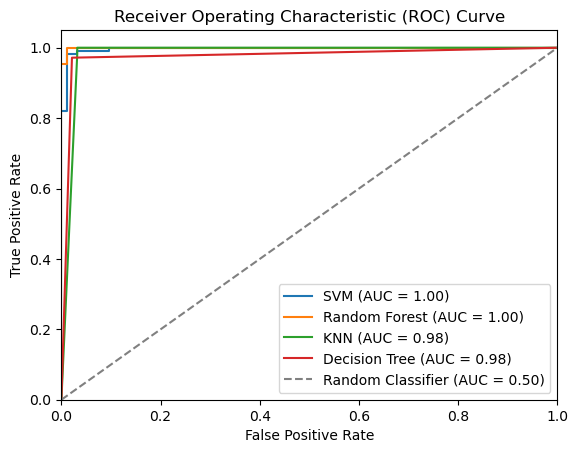

In [7]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to binary labels
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, label):
    y_score = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curve for SVM
plot_roc_curve(svm, X_test, y_test_binary, 'SVM')

# Plot ROC curve for Random Forest
plot_roc_curve(random_forest, X_test, y_test_binary, 'Random Forest')

# Plot ROC curve for KNN
plot_roc_curve(knn, X_test, y_test_binary, 'KNN')

# Plot ROC curve for Decision Tree
plot_roc_curve(decision_tree, X_test, y_test_binary, 'Decision Tree')

# Plot ROC curve for a random classifier (50% AUC)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.50)')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

